<a href="https://colab.research.google.com/github/Dobenkss/ImageProcessing/blob/main/Image-processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM IMAGE PROCESSING**
<br> <br>
Nama : Abhipraya Rasendriya Atma Ardany <br>
NIM : 24.21.1587

In [ ]:
import numpy as np
import os

In [ ]:
import zipfile

# extract zip file
with zipfile.ZipFile("Kucing.zip", 'r') as zip_ref:
    zip_ref.extractall()

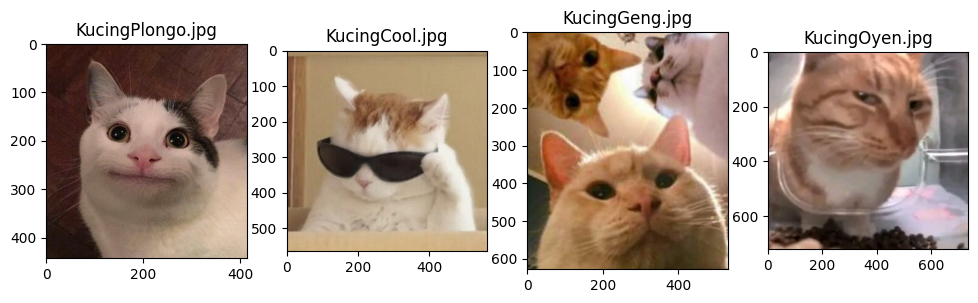

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Path folder
folder = "Kucing"
img_list = os.listdir(folder)

# Tampilkan semua gambar asli
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(img_list):
    img = Image.open(os.path.join(folder, img_name))
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(img_name)
plt.show()

In [ ]:
# path file agar bisa milih image yang mana saja
img_path = os.path.join(folder, img_list[2])
img = Image.open(img_path)

# Resize ke 128x128
img_resized = img.resize((128, 128))

# Crop ke tengah jadi 100x100
left = (128 - 100) / 2
top = (128 - 100) / 2
right = (128 + 100) / 2
bottom = (128 + 100) / 2
img_cropped = img_resized.crop((left, top, right, bottom))

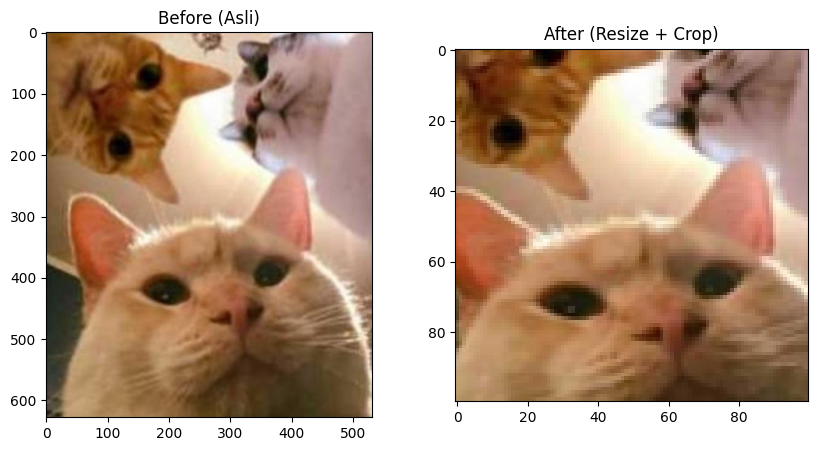

In [ ]:
# Tampilkan before & after
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Before (Asli)")

plt.subplot(1, 2, 2)
plt.imshow(img_cropped)
plt.title("After (Resize + Crop)")

plt.show()

In [ ]:
# Milih gambar
img_path = os.path.join(folder, img_list[3])

# Buka gambar dan resize agar seragam
img = Image.open(img_path).resize((100, 100))
img_array = np.array(img)

img_norm = img_array / 255.0 # normalisasi ke biner 0-1

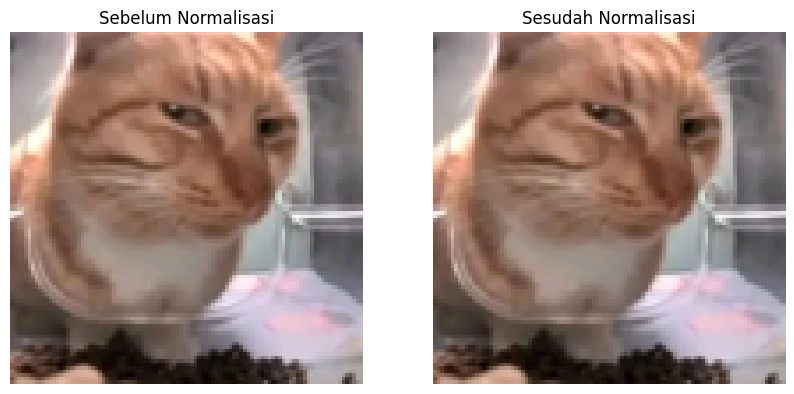

In [ ]:
# Visualisasi gambar sebelum & sesudah
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_array)
plt.title("Sebelum Normalisasi")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_norm)
plt.title("Sesudah Normalisasi")
plt.axis("off")

plt.show()

In [ ]:
# Tampilkan sebagian nilai piksel
print("Nilai piksel sebelum normalisasi:")
print(img_array[0:1, 0:5, :])

print("\nNilai piksel sesudah normalisasi:")
print(img_norm[0:1, 0:5, :])

Nilai piksel sebelum normalisasi:
[[[122 111 117]
  [125 113 119]
  [126 115 121]
  [127 115 122]
  [128 119 124]]]

Nilai piksel sesudah normalisasi:
[[[0.47843137 0.43529412 0.45882353]
  [0.49019608 0.44313725 0.46666667]
  [0.49411765 0.45098039 0.4745098 ]
  [0.49803922 0.45098039 0.47843137]
  [0.50196078 0.46666667 0.48627451]]]


In [ ]:
import cv2

img_path = os.path.join(folder, os.listdir(folder)[0]) # ambil gambar pertama

# Baca gambar dengan OpenCV dan ubah BGR ke RGB (agar warnanya benar di matplotlib)
img_cv = cv2.imread(img_path)
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

# Filtering
blurred = cv2.GaussianBlur(img_cv, (5, 5), 0) # menghaluskan gambar
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(img_cv, -1, kernel) # menajamkan gambar

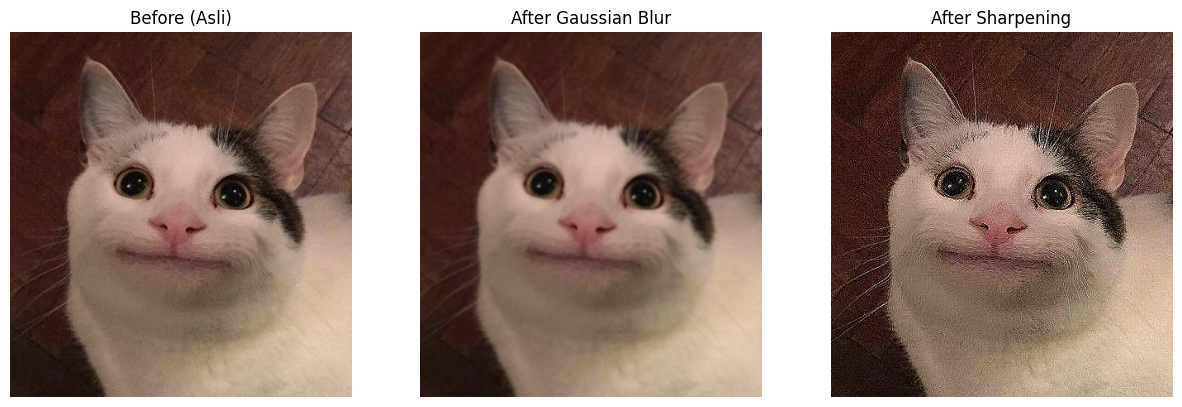

In [ ]:
# Visualisasi hasil
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_cv)
plt.title("Before (Asli)")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(blurred)
plt.title("After Gaussian Blur")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(sharpened)
plt.title("After Sharpening")
plt.axis("off")

plt.show()

In [ ]:
img_path = os.path.join(folder, os.listdir(folder)[1])

# Baca gambar dan ubah ke grayscale
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray_eq = cv2.equalizeHist(gray)
blurred = cv2.GaussianBlur(gray_eq, (5, 5), 0)

# Adaptive Thresholding
thresh = cv2.adaptiveThreshold(
    blurred, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    11, 2
)

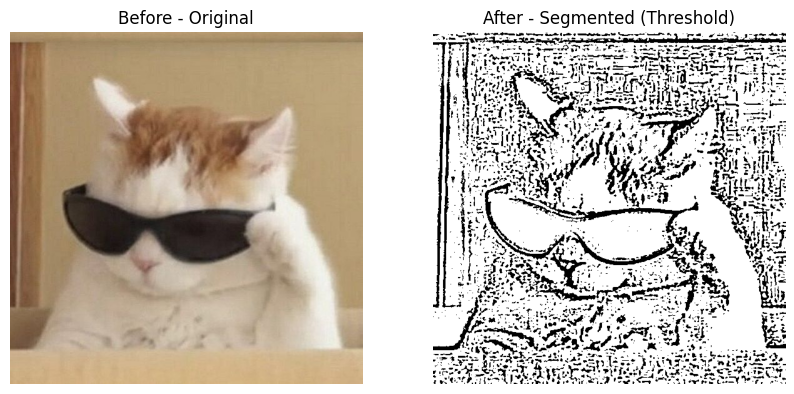

In [ ]:
# --- Visualisasi Before & After ---
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Before - Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(thresh, cmap='gray')
plt.title("After - Segmented (Threshold)")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img # abaikan bila ada peringantan tensorflow

datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

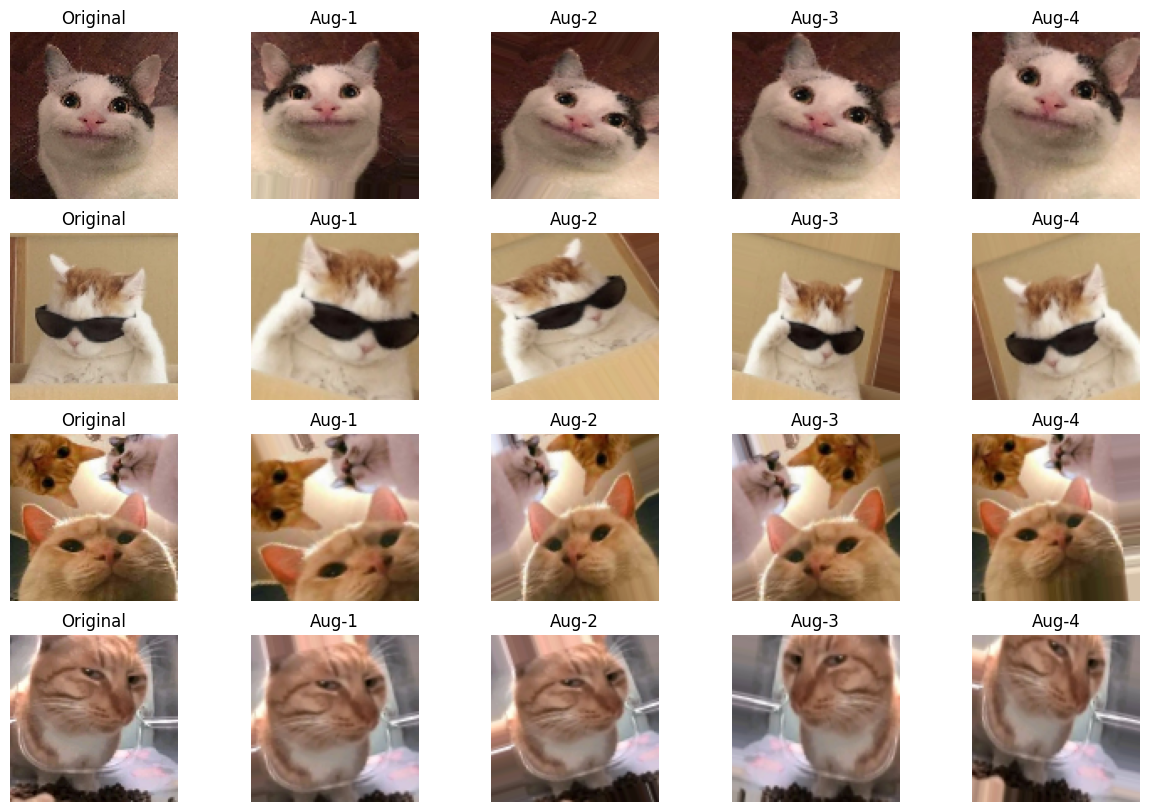

In [ ]:
# Pilih semua file di folder
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(img_list):
    img_path = os.path.join(folder, img_name)
    img = load_img(img_path, target_size=(100, 100))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # tampilkan original
    plt.subplot(len(img_list), 5, i*5+1)
    plt.imshow(img)
    plt.title("Original")
    plt.axis('off')

    # tampilkan 4 variasi augmentasi
    j = 2
    for batch in datagen.flow(x, batch_size=1):
        plt.subplot(len(img_list), 5, i*5+j)
        plt.imshow(array_to_img(batch[0]))
        plt.title(f"Aug-{j-1}")
        plt.axis('off')
        j += 1
        if j > 5:
            break

plt.show()

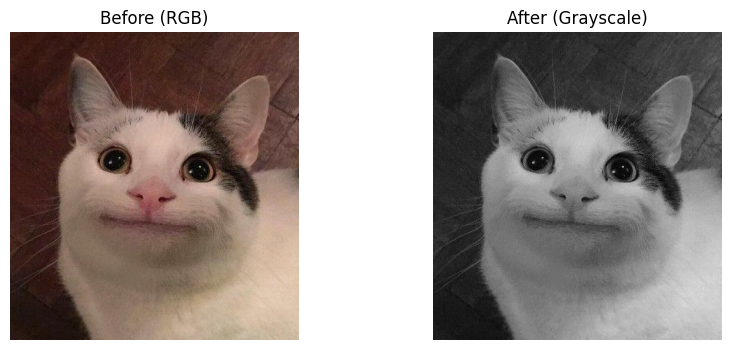

In [ ]:
gray = cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_cv); plt.title("Before (RGB)"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(gray, cmap='gray'); plt.title("After (Grayscale)"); plt.axis('off')
plt.show()

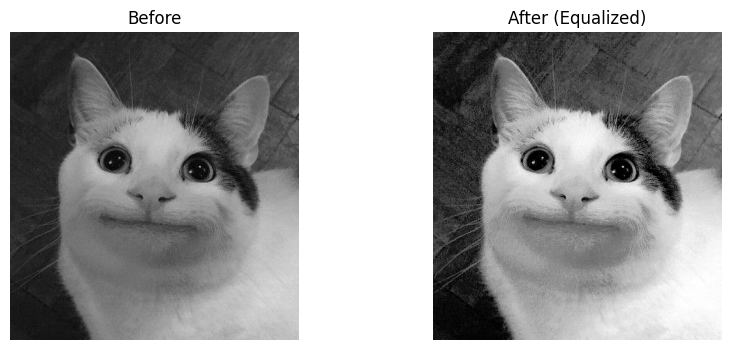

In [ ]:
equalized = cv2.equalizeHist(gray)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap='gray'); plt.title("Before"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(equalized, cmap='gray'); plt.title("After (Equalized)"); plt.axis('off')
plt.show()

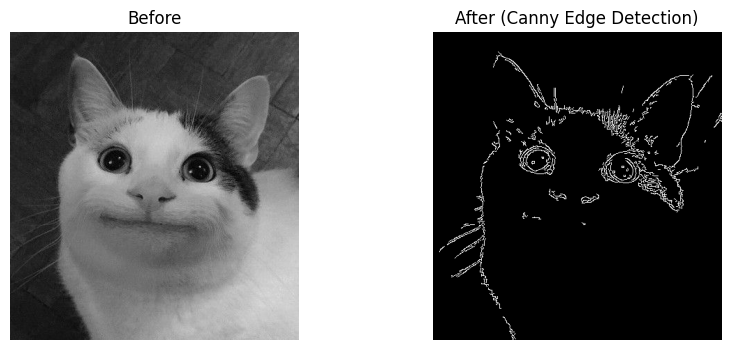

In [ ]:
edges = cv2.Canny(cv2.cvtColor(img_cv, cv2.COLOR_RGB2GRAY), 100, 200)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap='gray'); plt.title("Before"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(edges, cmap='gray'); plt.title("After (Canny Edge Detection)"); plt.axis('off')
plt.show()


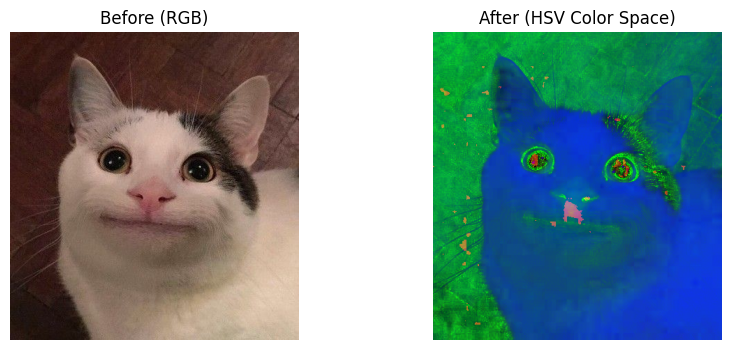

In [ ]:
hsv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_cv); plt.title("Before (RGB)"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(hsv); plt.title("After (HSV Color Space)"); plt.axis('off')
plt.show()


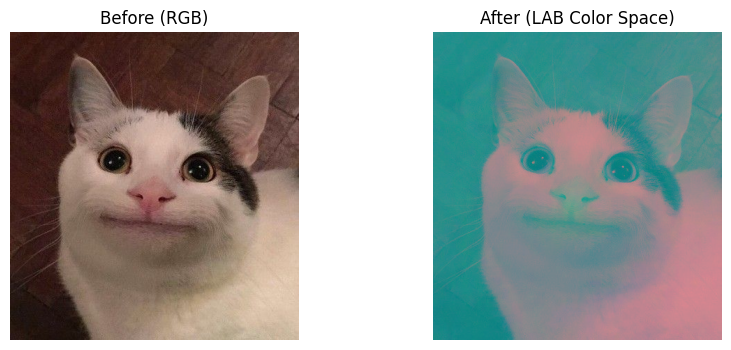

In [ ]:
lab = cv2.cvtColor (img_cv, cv2.COLOR_RGB2LAB)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_cv); plt.title("Before (RGB)"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(lab); plt.title("After (LAB Color Space)"); plt.axis('off')
plt.show()

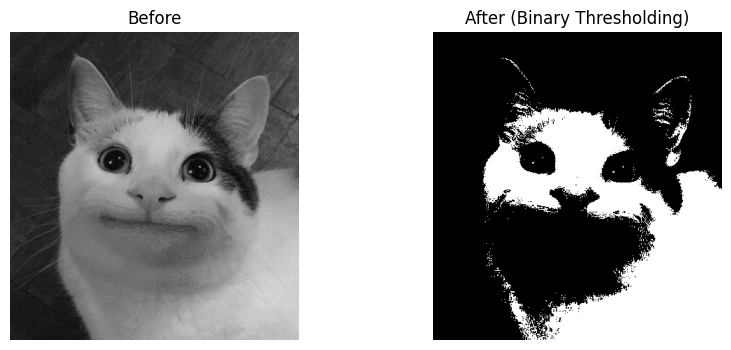

In [ ]:
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap='gray'); plt.title("Before"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(binary, cmap='gray'); plt.title("After (Binary Thresholding)"); plt.axis('off')
plt.show()

In [ ]:
median = cv2.medianBlur(img_cv, 5)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_cv); plt.title("Before"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(median); plt.title("After (Median Filter)"); plt.axis('off')
plt.show()

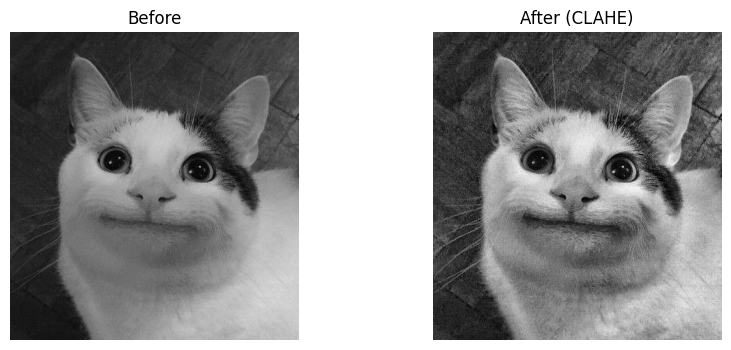

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(gray, cmap='gray'); plt.title("Before"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(clahe_img, cmap='gray'); plt.title("After (CLAHE)"); plt.axis('off')
plt.show()

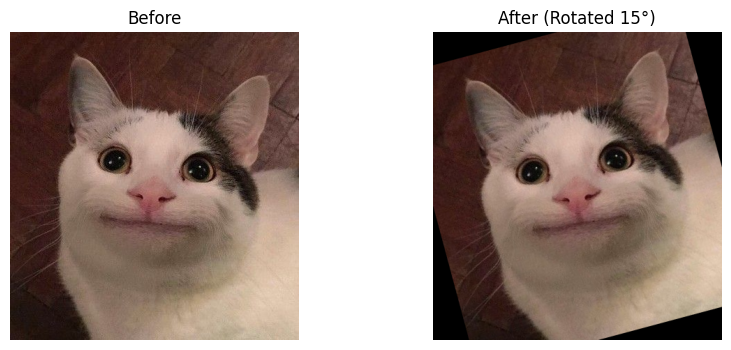

In [ ]:
(h, w) = img_cv.shape[:2]
center = (w // 2, h // 2)
rotated = cv2.warpAffine(img_cv, cv2.getRotationMatrix2D(center, 15, 1.0), (w, h))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_cv); plt.title("Before"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(rotated); plt.title("After (Rotated 15°)"); plt.axis('off')
plt.show()

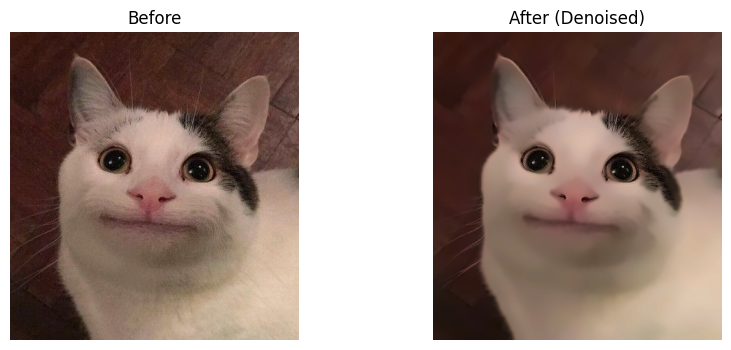

In [ ]:
denoised = cv2.fastNlMeansDenoisingColored(img_cv, None, 10, 10, 7, 21)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img_cv); plt.title("Before"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(denoised); plt.title("After (Denoised)"); plt.axis('off')
plt.show()


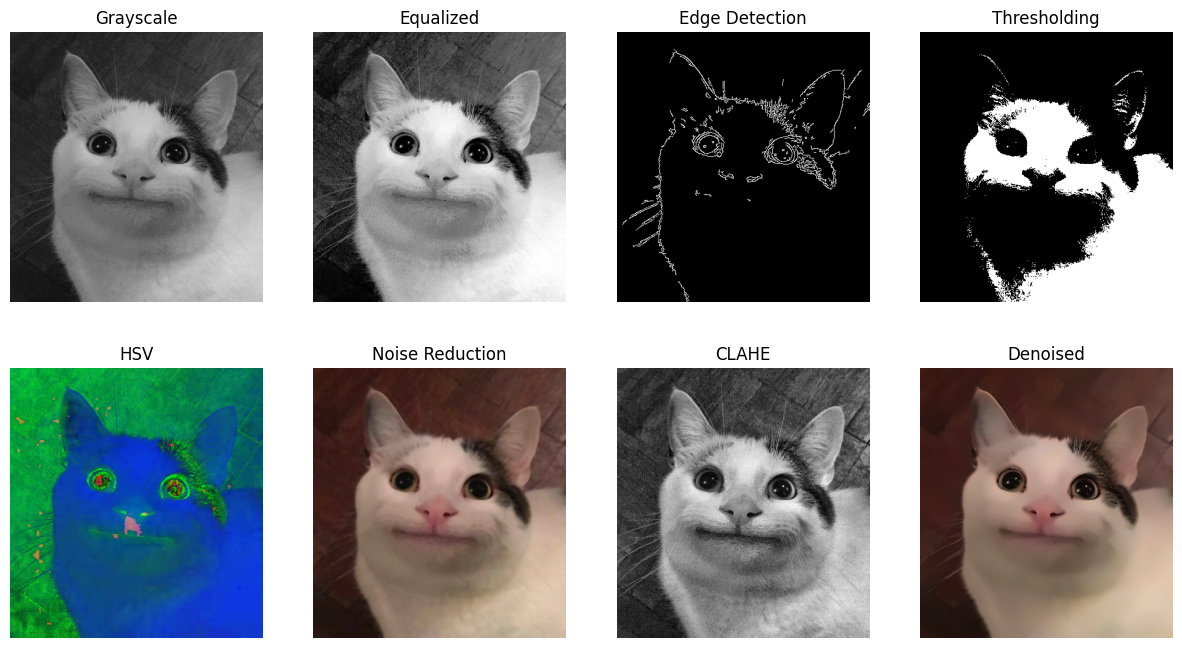

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,4,1); plt.imshow(gray, cmap='gray'); plt.title("Grayscale"); plt.axis('off')
plt.subplot(2,4,2); plt.imshow(equalized, cmap='gray'); plt.title("Equalized"); plt.axis('off')
plt.subplot(2,4,3); plt.imshow(edges, cmap='gray'); plt.title("Edge Detection"); plt.axis('off')
plt.subplot(2,4,4); plt.imshow(binary, cmap='gray'); plt.title("Thresholding"); plt.axis('off')
plt.subplot(2,4,5); plt.imshow(hsv); plt.title("HSV"); plt.axis('off')
plt.subplot(2,4,6); plt.imshow(median); plt.title("Noise Reduction"); plt.axis('off')
plt.subplot(2,4,7); plt.imshow(clahe_img, cmap='gray'); plt.title("CLAHE"); plt.axis('off')
plt.subplot(2,4,8); plt.imshow(denoised); plt.title("Denoised"); plt.axis('off')
plt.show()

In [ ]:
cv2.imwrite('Kucing_CV2.jpg', gray)

True

In [ ]:
img_cropped.save('Kucing_Pillow.png')